# Univariate feature

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
X = data.iloc[:, 0:20]
y = data.iloc[:, -1]

In [5]:
# apply SelectKBest top 10 features
best_features = SelectKBest(score_func=chi2, k =10 )

In [6]:
fit = best_features.fit(X, y)

In [7]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [8]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [9]:
featureScores = pd.concat([dfcolumns, dfscores], axis= 1)

In [10]:
featureScores.columns = ['Features', 'Score']

In [12]:
featureScores.head()

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166


In [17]:
featureScores.sort_values(by='Score', ascending= False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [13]:
ten_features = featureScores.sort_values(by='Score', ascending= False).head(10)['Features'].values

# Feature Importance

In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [19]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [20]:
model.feature_importances_

array([0.07312306, 0.0065942 , 0.02801703, 0.00696504, 0.02455504,
       0.00687447, 0.0367777 , 0.02376782, 0.03779869, 0.0220373 ,
       0.02902409, 0.0606788 , 0.05727959, 0.48209776, 0.02782666,
       0.02817931, 0.02910115, 0.0061714 , 0.0069241 , 0.00620678])

In [21]:
featureImportance =  pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])

In [22]:
featureImportance = featureImportance.sort_values(by="Importance", ascending= False)

In [23]:
featureImportance

,Importance
ram,0.482098
battery_power,0.073123
px_height,0.060679
px_width,0.057280
mobile_wt,0.037799
int_memory,0.036778
talk_time,0.029101
pc,0.029024
sc_w,0.028179
clock_speed,0.028017


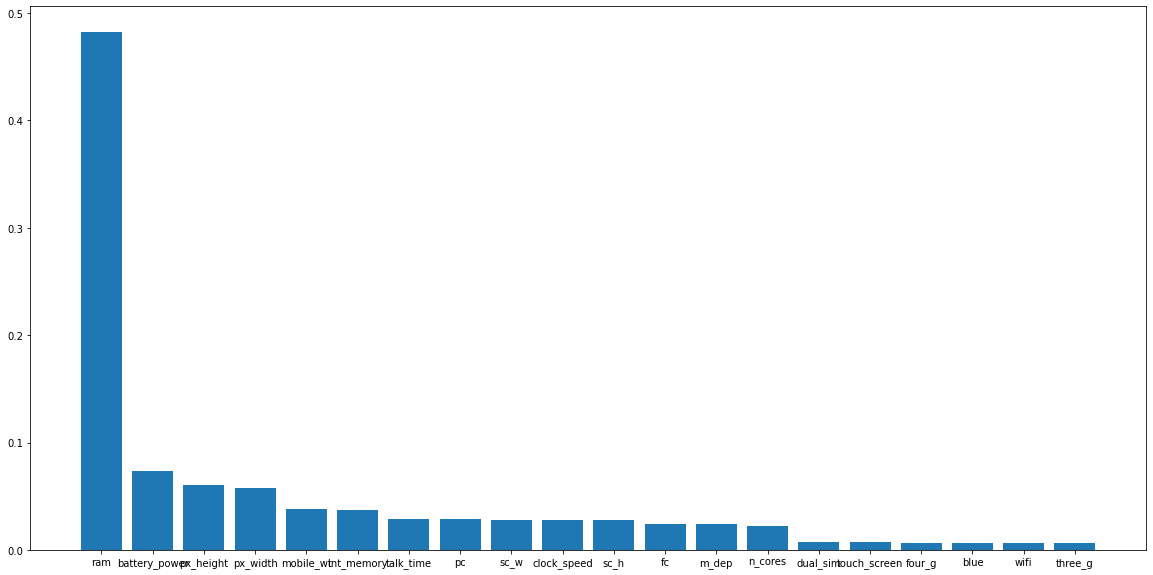

In [24]:
plt.figure(figsize=(20,10))
plt.bar(featureImportance.index, featureImportance['Importance'])
plt.show()

# Correlation Matix

In [25]:
import seaborn as sns

In [26]:
data_corr = data.corr()

In [27]:
data_corr.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998


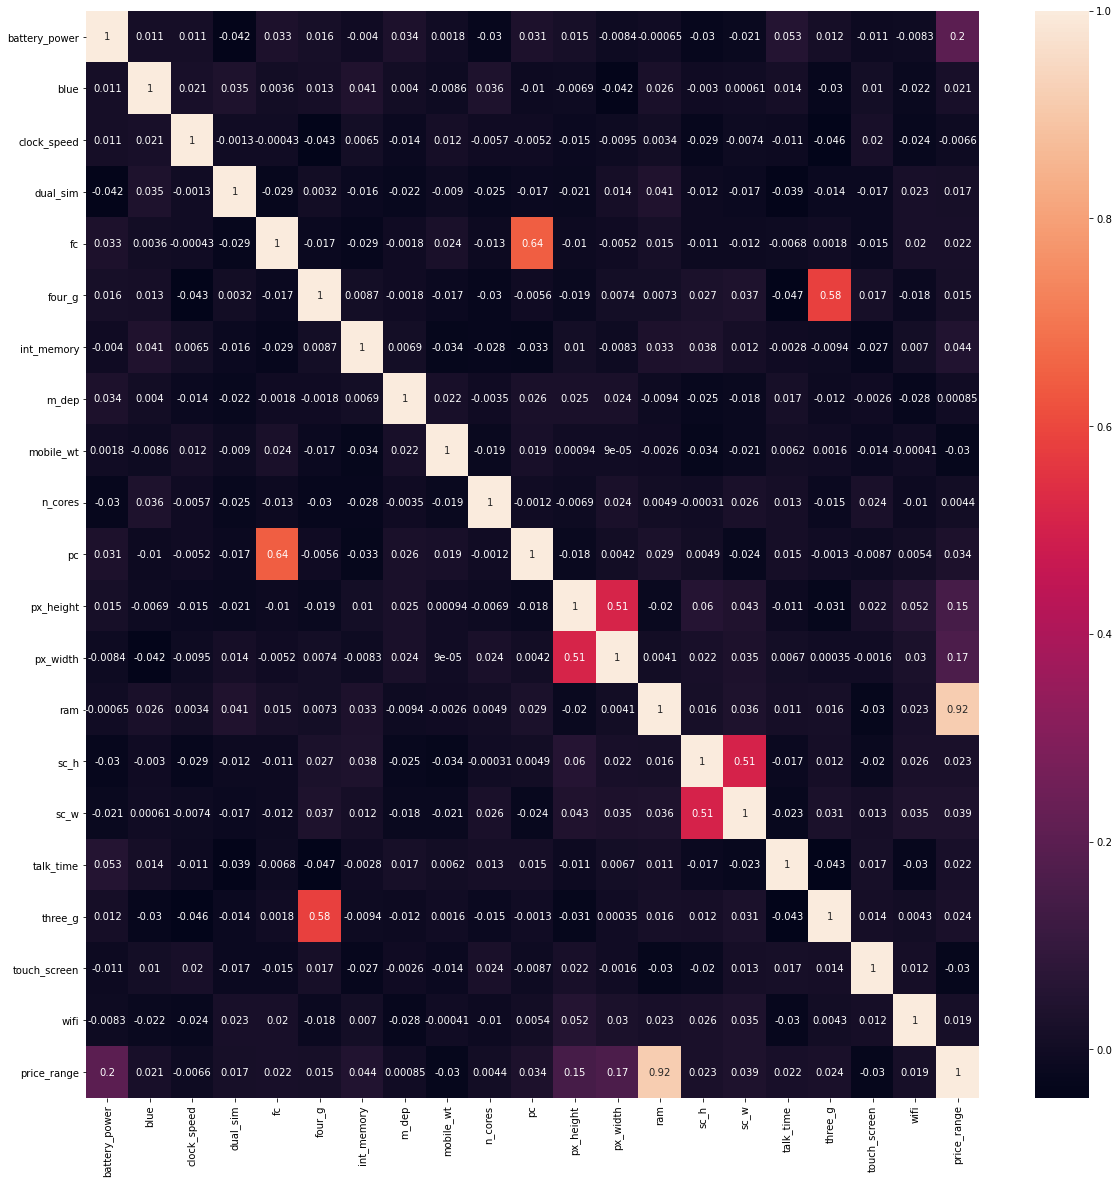

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(data_corr, annot=True)
plt.show()

# Check model performance

### Before

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [30]:
rfc = RandomForestClassifier(max_depth=10)

In [31]:
scores = cross_val_score(rfc, X, y, cv = 10)

In [32]:
scores.mean()

0.8735000000000002

### After

In [33]:
X[ten_features]

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [34]:
scores_new = cross_val_score(rfc, X[ten_features], y, cv = 10)

In [35]:
scores_new.mean()

0.8959999999999999